In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [137]:
data= pd.read_csv('ramen-ratings.csv') # Read Csv File

In [138]:
data.head(4)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN


In [139]:
from sklearn import preprocessing

In [140]:
data.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [141]:
df = data.drop('Top Ten',axis=1) # Dropping Top Ten as the columns has many missing values

In [142]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [143]:
df.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars
count,2580.000000,2580,2580,2578,2580,2580
unique,NaN,355,2413,7,38,51
top,NaN,Nissin,Chicken,Pack,Japan,4
freq,NaN,381,7,1531,352,384
mean,1290.500000,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN


In [144]:
df['Variety'].value_counts()

Chicken                                                                         7
Beef                                                                            7
Yakisoba                                                                        6
Vegetable                                                                       6
Artificial Chicken                                                              6
Miso Ramen                                                                      5
Spicy Beef                                                                      4
Curry Udon                                                                      4
Artificial Beef Flavor                                                          4
Artificial Spicy Beef                                                           4
Instant Noodles Chicken Flavour                                                 4
Curry Flavour Instant Noodles                                                   4
Tom Yum Shrimp  

In [145]:
df.isnull().sum() # To find if there are any null values

Review #    0
Brand       0
Variety     0
Style       2
Country     0
Stars       0
dtype: int64

In [146]:
#df['Style']=df['Style'].fillna('Pack')

In [147]:
df.isnull().sum() 

Review #    0
Brand       0
Variety     0
Style       2
Country     0
Stars       0
dtype: int64

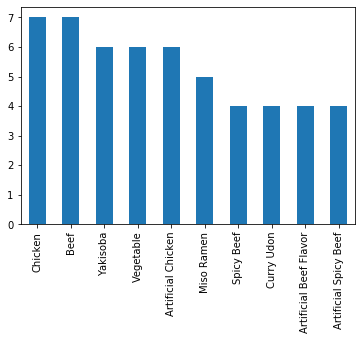

In [149]:
df['Variety'].value_counts().head(10).plot(kind='bar') #Top 10 variety

Inference:Highest selling Variety is non vegeterian Variety

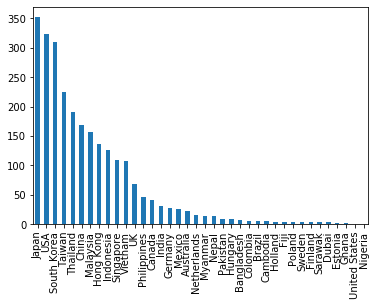

In [150]:
df['Country'].value_counts().plot(kind='bar') #Distribution of Countries

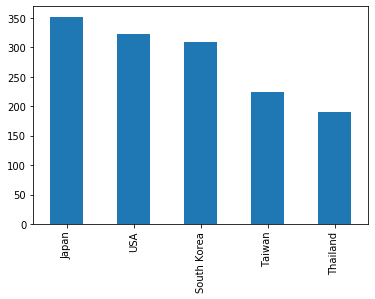

In [151]:
df['Country'].value_counts().head(5).plot(kind='bar') #Top Five countries selling Ramen

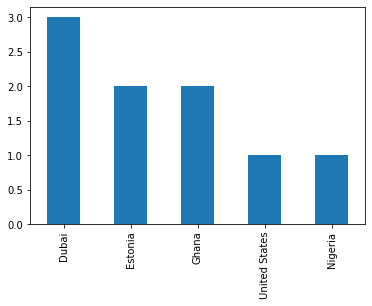

In [152]:
df['Country'].value_counts().tail(5).plot(kind='bar') # Least Popular countries

Inference: Japan is the highest consumer of Ramen, Nigeria is the least consumer of Ramen

In [153]:
df[df['Style'].isnull()] #Missing values in the column Style

,Review #,Brand,Variety,Style,Country,Stars
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3


In [154]:
df_kamfen=df[df['Brand']=='Kamfen']  # Filling the Style value according to the brand Kamfen on how it sells in China
Df_kam_ch=df_kamfen[df_kamfen['Country']=='China']
Df_kam_ch['Style'].value_counts()

Pack    4
Tray    3
Name: Style, dtype: int64

In [155]:
df_unif=df[df['Brand']=='Unif'] # Filling the Style value according to the brand Unif on how it sells in Taiwan
df_unif_ta=df_unif[df_unif['Country']=='Taiwan']
df_unif_ta['Style'].value_counts()

Bowl    7
Pack    3
Name: Style, dtype: int64

In [156]:
df.loc[2152,'Style'] = 'Pack'  # Replacing the values

In [157]:
df.loc[2442,'Style'] = 'Bowl'  # Replacing the values

In [158]:
df.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

In [160]:
df['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
4.50         3
Unrated      3
3.8          3
4.0          3
2.9          2
2.3          2
3.1          2
2.8          2
1.1          2
4.125        2
3.0          2
3.3          1
3.65         1
3.4          1
3.7          1
0.1          1
2.85         1
1.8          1
3.125        1
3.2          1
0.75         1
0.9          1
3.00         1
3.6          1
2.1          1
2.125        1
Name: Stars, dtype: int64

In [161]:
df[df['Stars']=='Unrated'] # 3 values of stars were unrated

,Review #,Brand,Variety,Style,Country,Stars
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [162]:
df.loc[32,'Stars'] = 0 #Assuming the ramen was not rated because it wasnt liked, we assign rating as 0
df.loc[122,'Stars'] = 0
df.loc[993,'Stars'] = 0

In [163]:
df['Stars']=pd.to_numeric(df['Stars']) #Converting Value of stars to numeric

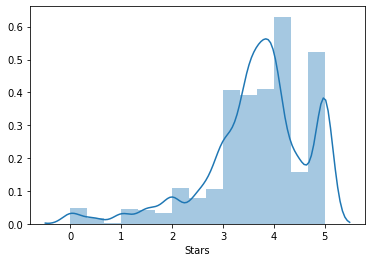

In [164]:
sns.distplot(df['Stars'], bins=15) #Distribution plot for Stars

We see that the distribution of stars is maximum in the range 3.5 to 4, which tells us the majority of the Ramen are rated in that range

In [165]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [166]:
country_rate = df.groupby('Country', as_index=False)['Stars'].median() # grouping countries by their median star rating

In [167]:
country_rate.sort_values(['Stars'], ascending=False).head(10) # Top 10 countries according to star rating

,Country,Stars
2,Brazil,4.250
19,Malaysia,4.125
29,Singapore,4.000
3,Cambodia,4.000
20,Mexico,4.000
1,Bangladesh,4.000
18,Japan,4.000
17,Indonesia,4.000
9,Fiji,4.000
14,Hong Kong,4.000


In [168]:
country_rate.sort_values(['Stars'], ascending=False).tail(10)  # Last 10 countries according to star rating

,Country,Stars
10,Finland,3.500
8,Estonia,3.500
6,Colombia,3.375
25,Pakistan,3.250
31,Sweden,3.250
34,UK,3.250
23,Netherlands,3.000
0,Australia,3.000
4,Canada,2.250
24,Nigeria,1.500


In [169]:
df['Stars'].describe()

count    2580.000000
mean        3.650426
std         1.022358
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

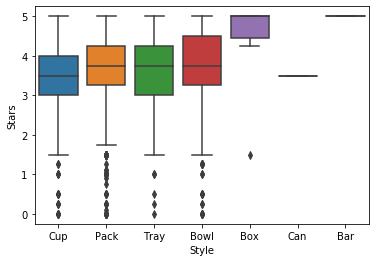

In [170]:
sns.boxplot(df['Style'],df['Stars']) # boxplot to show the spread

In [171]:
df_high=df[df['Stars']>4.5]

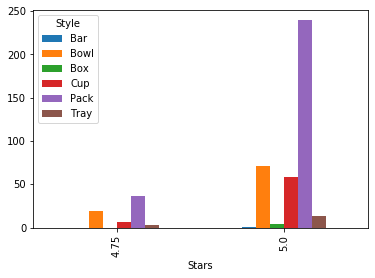

In [172]:
pd.crosstab(df_high['Stars'],df_high['Style']).plot(kind='bar') # distribution of packages having more than 4.75 

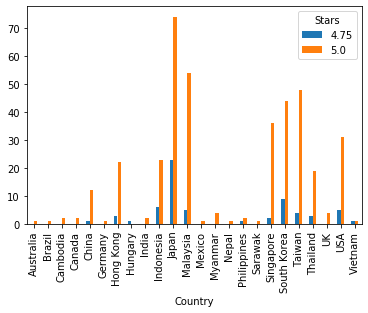

In [173]:
pd.crosstab(df_high['Country'],df_high['Stars']).plot(kind='bar') #distribution of countries having more than 4.75 stars

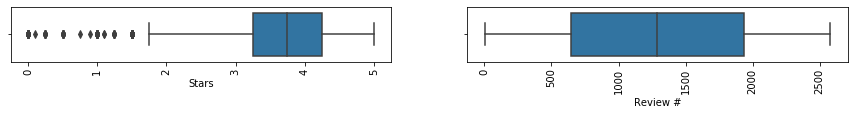

In [174]:
features=['Stars','Review #']    # subplots for Stars and Review
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(x=j,data = df)
    plt.xticks(rotation=90)
    #plt.title("Telecom")
    
plt.show()

In [175]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

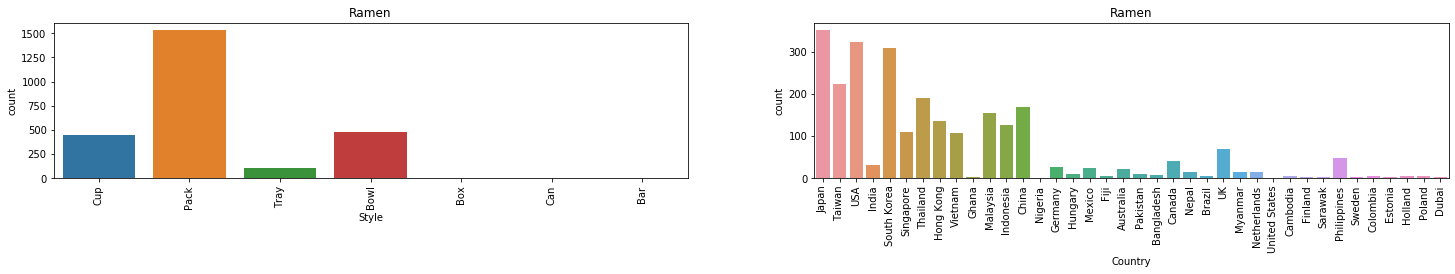

In [176]:
features=['Style', 'Country'] # Subplot for count plot
fig=plt.subplots(figsize=(25,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("Ramen")
    
plt.show()

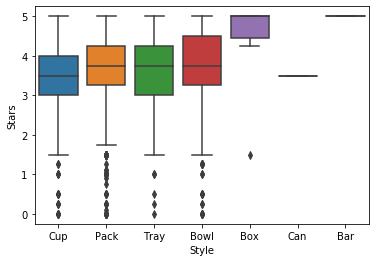

In [177]:
sns.boxplot(x = df.Style, y = df.Stars)

Value counts for outlier data

In [187]:
df_cup=df[(df['Style']=='Cup') & (df['Stars']<1.5)]
df_cup


,Review #,Brand,Variety,Style,Country,Stars
154,2426,Dr. McDougall's,Vegan Pad Thai Noodle Soup,Cup,USA,0.00
198,2382,Nongshim,Seaweed Instant Noodle,Cup,South Korea,0.50
361,2219,Fantastic,Noodles Crispy Bacon Flavour,Cup,Australia,1.00
557,2023,Urban Noodle,Authentic Street Food Black Bean,Cup,UK,0.00
624,1956,Maruchan,Spicy Tomato Salsa Ramen,Cup,Japan,0.00
657,1923,Conimex,Oriental Noodles Teriyaki,Cup,Netherlands,0.50
719,1861,Conimex,Oriental Noodles Groene Curry,Cup,Netherlands,0.50
780,1800,Crystal Noodle,Soup All Natural Hot & Sour,Cup,USA,0.25
911,1669,A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1.25
938,1642,Campbell's,Hearty Noodles Savoury Beef Flavour,Cup,Canada,0.25


In [196]:
df_pack=df[(df['Style']=='Pack') & (df['Stars']<1.75)]
df_pack['Brand'].value_counts().head()


Ottogi        4
Koyo          3
Baijia        3
Lucky Me!     3
GreeNoodle    3
Name: Brand, dtype: int64

In [189]:
df_knorr=df[(df['Brand']=='Knorr')]
df_knorr

,Review #,Brand,Variety,Style,Country,Stars
234,2346,Knorr,Chatt Patta Instant Noodles,Pack,Pakistan,1.00
387,2193,Knorr,Chicken Flavored Instant Noodles,Pack,Pakistan,3.00
1070,1510,Knorr,Quick Serve Macaroni Wonton Broth,Pack,Hong Kong,3.25
1143,1437,Knorr,Quick Serve Macaroni Abalone & Chicken Flavour,Pack,Hong Kong,3.00
1279,1301,Knorr,Quick Serve Macaroni Shrimp Broth,Pack,Hong Kong,3.25
1530,1050,Knorr,Japanese Pork Bone Flavour Quick Serve Macaroni,Pack,Hong Kong,3.00
2076,504,Knorr,Pizza,Pack,Pakistan,3.00
2212,368,Knorr,Chili Pork,Cup,Thailand,3.50


In [195]:
df_box=df[(df['Style']=='Box') & (df['Stars']>4)]
df_box['Brand'].value_counts().head()


MyKuali                   3
The Ramen Rater Select    1
La Fonte                  1
Name: Brand, dtype: int64

In [194]:
df_bowl=df[(df['Style']=='Bowl') & (df['Stars']<3.25)]
df_bowl['Brand'].value_counts().head()

Nissin           10
Myojo             5
Mr. Noodles       5
Nongshim          5
Fashion Foods     4
Name: Brand, dtype: int64

In [197]:
df_tray=df[(df['Style']=='Tray') & (df['Stars']<1.5)]
df_tray['Brand'].value_counts().head()


Guava Story        1
Nan Jie Cun        1
US Canning         1
Liang Cheng Mai    1
IbuRamen           1
Name: Brand, dtype: int64

In [198]:
df_canbar=df[(df['Style']=='Can') | (df['Style']=='Bar')]
df_canbar


,Review #,Brand,Variety,Style,Country,Stars
67,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.5
1425,1155,Komforte Chockolates,Savory Ramen,Bar,USA,5.0


In [199]:
df['Style'].value_counts()

Pack    1532
Bowl     482
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

Label Encoding for values to hange it into numerals

In [200]:
from sklearn import preprocessing

In [43]:
#data=df.drop('Variety',axis=1)

In [201]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [202]:
data = df.apply(preprocessing.LabelEncoder().fit_transform)

In [208]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2579,190,2189,4,18,33
1,2578,119,1443,5,32,6
2,2577,192,454,4,35,15
3,2576,336,709,5,32,18
4,2575,38,1954,5,16,33


In [210]:
data['Style'].value_counts()

5    1532
1     482
4     450
6     108
2       6
3       1
0       1
Name: Style, dtype: int64

Since the value count  of style is 7 and its not easy to balance the data.So for the sake of practicing Machine learning wehave grouped them into Packs as 0 and others as 1

In [219]:
data['Category'] = [0 if x == 5 else 1 for x in data['Style']] 
  
# Print the DataFrame 
print(data.head()) 

   Review #  Brand  Variety  Style  Country  Stars  Category
0      2579    190     2189      4       18     33         1
1      2578    119     1443      5       32      6         0
2      2577    192      454      4       35     15         1
3      2576    336      709      5       32     18         0
4      2575     38     1954      5       16     33         0


In [220]:
df=data.drop('Style',axis= 1)

In [221]:

from sklearn.model_selection import train_test_split



Automatically created module for IPython interactive environment


In [222]:
X=df.drop('Category',axis=1) # spliting dataframe as X and y for test train model
y=df['Category']

In [223]:
dfx=X
dfy=y

In [224]:
from sklearn.model_selection import train_test_split # spliting as 70 / 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=425)

# Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
y_pred = classifier.predict(X_test)

In [227]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[456  24]
 [270  24]]


In [228]:
accuracy_score(y_test,y_pred)

0.6201550387596899

In [229]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       480
           1       0.50      0.08      0.14       294

    accuracy                           0.62       774
   macro avg       0.56      0.52      0.45       774
weighted avg       0.58      0.62      0.52       774



# Decision Trees

In [230]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [231]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [232]:
y_pred = classifier.predict(X_test)

In [233]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[345 135]
 [117 177]]


In [234]:
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

0.6744186046511628
0.6570304695304695
0.6603954081632653


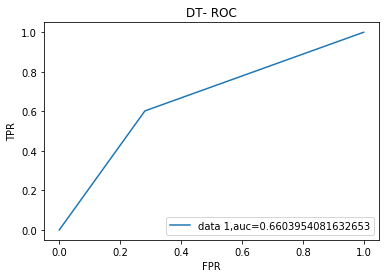

In [235]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("DT- ROC")
plt.legend(loc= 4)
plt.show()


In [236]:
#!pip install pydotplus

In [237]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [238]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Country', 'Stars', 'Category'], dtype='object')

In [239]:
feature_cols=['Review #', 'Brand', 'Country','Stars']

In [240]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [241]:
dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data,filled = True,rounded = True, special_characters = True,feature_names= feature_cols,class_names =['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Ramen.png')
Image(graph.create_png())

ValueError: Length of feature_names, 4 does not match number of features, 5

In [242]:
clf = DecisionTreeClassifier(class_weight=None,criterion = 'gini',max_depth=10,max_features=None, max_leaf_nodes= 5, min_samples_leaf=3,
                             min_samples_split=2,min_weight_fraction_leaf=0.0,presort=False , random_state = 0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [243]:
y_pred = clf.predict(X_test)

In [244]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[446  34]
 [236  58]]


In [245]:
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

0.6511627906976745
0.6421968634451103
0.5632227891156463


In [246]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled = True,rounded = True, special_characters = True,feature_names= feature_cols,class_names =['0','1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Prune RAmen.png')
Image(graph.create_png())

ValueError: Length of feature_names, 4 does not match number of features, 5

# Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(n_estimators= 100)

In [248]:
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [249]:
y_pred = rclf.predict(X_test)

In [250]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[400  80]
 [119 175]]
0.7428940568475452
0.7284937096225774
0.7142857142857143


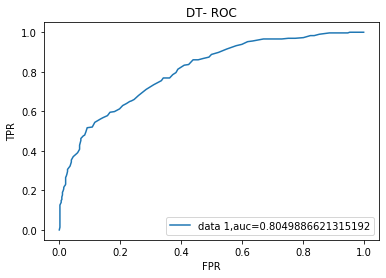

In [251]:
y_pred_proba = rclf.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("DT- ROC")
plt.legend(loc= 4)
plt.show()

# KNN

In [252]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:
y_pred = classifier.predict(X_test)

In [254]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[353 127]
 [147 147]]


In [255]:
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

0.6459948320413437
0.6212481751824817
0.6177083333333333


In [256]:
from sklearn.model_selection import cross_val_score

k_range = range(1,31)
k_scores =[]
#loop through reasonable values of k
for k in k_range:
    #run knn
    knn = KNeighborsClassifier(n_neighbors= k)
    # obtin cross_val_Score
    scores = cross_val_score(knn,X,y,cv= 10,scoring='accuracy')
    #append mean scores
    k_scores.append(scores.mean())
print(k_scores)



[0.4946953268145921, 0.5128838541606615, 0.4873323774282964, 0.5071028588990764, 0.4900530848725583, 0.4989708065809776, 0.48812409110119714, 0.5039975941659046, 0.5009133970766403, 0.5082597800044185, 0.4966378008500893, 0.514841398141552, 0.495060289680686, 0.5163857531018874, 0.49815956836136, 0.514823288585844, 0.5008712152047596, 0.5159785501338302, 0.5012678261207806, 0.509003279168875, 0.49504672789443394, 0.5144311905012294, 0.5059085366116405, 0.5175319889870609, 0.5086201951010565, 0.5186707423066125, 0.5140195445778651, 0.5237050357491947, 0.5209857898800075, 0.526412216345254]


In [257]:
k=pd.DataFrame(k_scores,columns= ['dist'])
#print(k)
k[k['dist']== k['dist'].max()]

,dist
29,0.526412


Text(0, 0.5, 'Cross validated Accuracy')

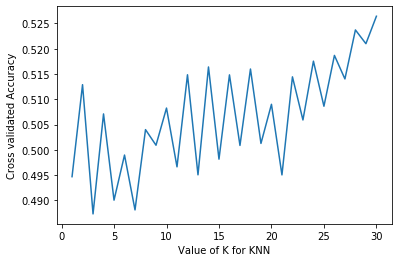

In [258]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validated Accuracy')

In [259]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 19)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [260]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors= 19)
# classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
# cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
# print('Confusion Matrix \n',cm)
# print(accuracy_score(y_test,y_pred))
# print(metrics.precision_score(y_test,y_pred,average='macro'))
# print(metrics.recall_score(y_test,y_pred,average='macro'))

In [261]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[372 108]
 [165 129]]


In [262]:
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

0.6472868217054264
0.6185206138179762
0.6068877551020408


# grid KNN

In [263]:
k_range= list(range(1,31))
weight_options=["uniform","distance"]

In [264]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn= KNeighborsClassifier()

In [265]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [266]:
#grid = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy')
#grid.fit(X,y)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.5263565891472868
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')
{'n_neighbors': 30, 'weights': 'uniform'}


In [267]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 12)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[387  93]
 [172 122]]
0.6576227390180879
0.6298747763864043
0.610607993197279


# Naive Bayes

In [268]:
from sklearn.naive_bayes import GaussianNB

In [269]:
model = GaussianNB()

In [270]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [271]:
predicted = model.predict(X_test)
print('Predicted Value',predicted)

Predicted Value [0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 

In [272]:
cm = confusion_matrix(y_true=y_test,y_pred=predicted)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[430  50]
 [240  54]]


In [273]:
print(accuracy_score(y_test,predicted))
print(metrics.precision_score(y_test,predicted,average='macro'))
print(metrics.recall_score(y_test,predicted,average='macro'))

0.6253229974160207
0.5805109070034443
0.5397534013605443


# Ensemble Techniques

# Bagged Decision Trees for Classification - necessary dependencies

In [274]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [275]:
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7034883720930233


In [276]:
 # fit a ensemble.BaggingClassifier() model to the data
model = BaggingClassifier()
model.fit(X_train, y_train)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [277]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

In [278]:
from sklearn import metrics
print(); print('ensemble.BaggingClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print(); print(metrics.classification_report(expected_y, predicted_y))


ensemble.BaggingClassifier(): 

Accuracy: 0.7248062015503876

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       480
           1       0.67      0.54      0.60       294

    accuracy                           0.72       774
   macro avg       0.71      0.69      0.70       774
weighted avg       0.72      0.72      0.72       774



# Extra Trees Classifiers

In [279]:
# fit a ensemble.ExtraTreesClassifier() model to the data
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


In [280]:
# summarize the fit of the model
print(); print('ensemble.ExtraTreesClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


ensemble.ExtraTreesClassifier(): 

Accuracy: 0.7131782945736435

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       480
           1       0.65      0.54      0.59       294

    accuracy                           0.71       774
   macro avg       0.70      0.68      0.68       774
weighted avg       0.71      0.71      0.71       774


[[394  86]
 [136 158]]


In [281]:
# Boosting Methods

In [282]:
#import the libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [283]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [284]:
predictions = classifier.predict(X_test)
confusion_matrix(y_test, predictions)
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6602067183462532


In [285]:
confusion_matrix(y_test, predictions)

array([[358, 122],
       [141, 153]], dtype=int64)

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.665
Accuracy score (validation): 0.661
Learning rate:  0.075
Accuracy score (training): 0.674
Accuracy score (validation): 0.669
Learning rate:  0.1
Accuracy score (training): 0.684
Accuracy score (validation): 0.663
Learning rate:  0.25
Accuracy score (training): 0.703
Accuracy score (validation): 0.642
Learning rate:  0.5
Accuracy score (training): 0.713
Accuracy score (validation): 0.647
Learning rate:  0.75
Accuracy score (training): 0.748
Accuracy score (validation): 0.654
Learning rate:  1
Accuracy score (training): 0.756
Accuracy score (validation): 0.667


In [288]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print();print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print();print("Classification Report")
print();print(classification_report(y_test, predictions))

Confusion Matrix:
[[366 114]
 [154 140]]

Accuracy: 0.6537467700258398

Classification Report

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       480
           1       0.55      0.48      0.51       294

    accuracy                           0.65       774
   macro avg       0.63      0.62      0.62       774
weighted avg       0.65      0.65      0.65       774



In [289]:
#!pip install xgboost
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [129]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[391, 139],
       [ 89, 155]], dtype=int64)

In [130]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7054263565891473


In [131]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from xgboost.sklearn import XGBClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [132]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [133]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.64159292]
    fold  1:  [0.63274336]
    fold  2:  [0.63858093]
    fold  3:  [0.63636364]
    ----
    MEAN:     [0.63732021] + [0.00322909]
    FULL:     [0.63732004]

model  1:     [RandomForestClassifier]
    fold  0:  [0.64380531]
    fold  1:  [0.59513274]
    fold  2:  [0.68292683]
    fold  3:  [0.66075388]
    ----
    MEAN:     [0.64565469] + [0.03229971]
    FULL:     [0.64562569]

model  2:     [XGBClassifier]
    fold  0:  [0.68805310]
    fold  1:  [0.67035398]
    fold  2:  [0.73392461]
    fold  3:  [0.68070953]
    ----
    MEAN:     [0.69326031] + [0.02430495]
    FULL:     [0.69324474]



## USL

KMeans

In [134]:
X.head()

,Review #,Brand,Country,Stars
0,2579,190,18,33
1,2578,119,32,6
2,2577,192,35,15
3,2576,336,32,18
4,2575,38,16,33


In [135]:
X.columns

Index(['Review #', 'Brand', 'Country', 'Stars'], dtype='object')

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(X)

In [551]:
X=pd.DataFrame(df,columns=['Review #', 'Brand', 'Country', 'Stars'])

In [552]:
cluster_range = range(1,15)
cluster_errors=[]

In [553]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [554]:
for num_clusters in cluster_range:
    clusterrs = KMeans(num_clusters)
    clusterrs.fit(X)
    cluster_errors.append(clusterrs.inertia_)

In [555]:
culters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
culters_df[0:10]

,num_clusters,cluster_errors
0,1,10320.000000
1,2,7747.652611
2,3,6462.235481
3,4,5557.805832
4,5,4853.192747
5,6,4339.017982
6,7,3950.459848
7,8,3649.574020
8,9,3390.622195
9,10,3155.946653


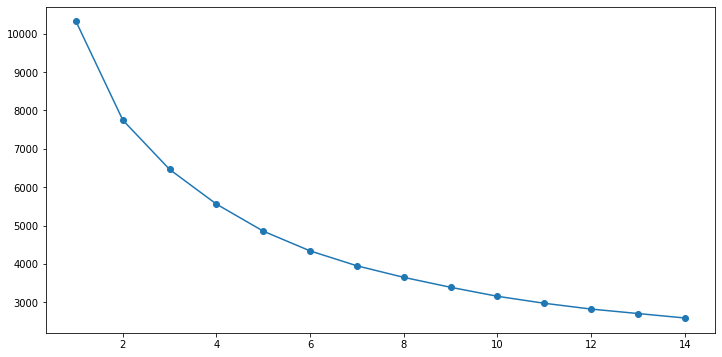

In [556]:
plt.figure(figsize=(12,6))
plt.plot(culters_df.num_clusters,culters_df.cluster_errors,marker = 'o')

In [557]:
kmeans = KMeans(n_clusters=4, n_init = 10, random_state=251)

In [558]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=251, tol=0.0001, verbose=0)

In [559]:
centroids = kmeans.cluster_centers_

In [560]:
centroid_df = pd.DataFrame(centroids, columns = list(X) )

In [561]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [562]:
# df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

# df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled = X.join(df_labels)
# df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177) 
# df_analysis.head(3)

In [563]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177) 
df_analysis.head(3)

,Review #,Brand,Country,Stars,labels
0,1.731380,0.074807,-0.617517,0.294504,2
1,1.730037,-0.731684,0.786001,-2.470339,0
2,1.728694,0.097525,1.086755,-1.548725,0


In [564]:
y_test = y
y_pred= df_analysis['labels']
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[214 394 479 445]
 [185 180 382 301]
 [  0   0   0   0]
 [  0   0   0   0]]
0.15271317829457365
0.21248242557613545
0.07786060231598668


In [565]:
from sklearn.model_selection import train_test_split  

X= df_analysis.drop('labels',axis =1)
y= df_analysis['labels']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [566]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [567]:
# predict Model
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
accuracy_score(y_test,y_pred)

Confusion Matrix 
 [[108   0   3   4]
 [  4 167   8   0]
 [  0   5 235   1]
 [  3   1  15 220]]


0.9431524547803618

In [568]:
# DTfrom sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[109   1   4   1]
 [  3 168   6   2]
 [  1  10 226   4]
 [  2   4   8 225]]
0.9405684754521964
0.9404789920613463
0.9413888758079714


In [569]:
X.columns

Index(['Review #', 'Brand', 'Country', 'Stars'], dtype='object')

In [570]:
feature_cols=['Review #', 'Brand', 'Country', 'Stars']

In [571]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

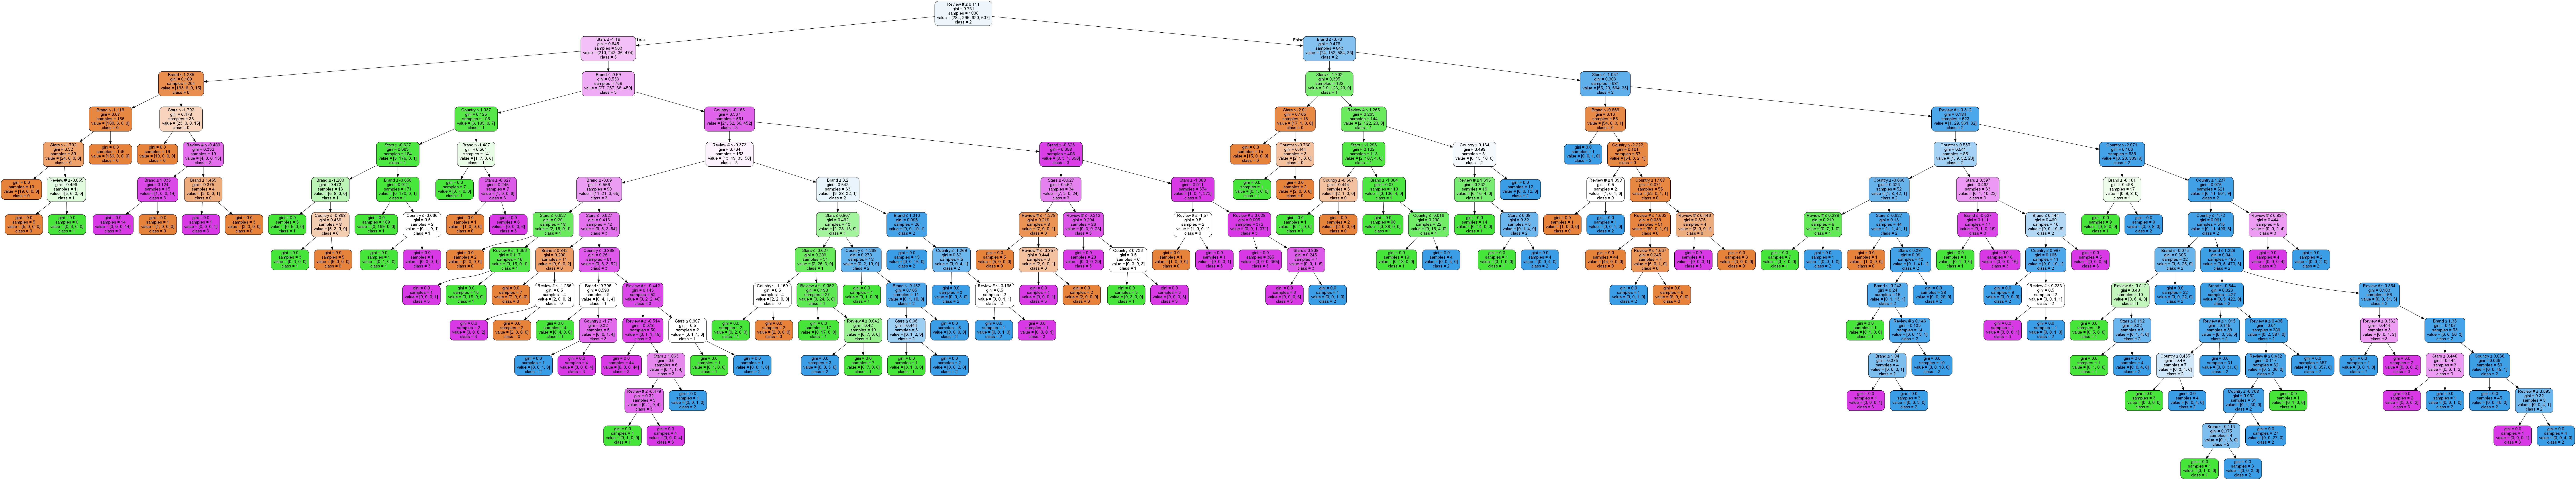

In [572]:
dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data,filled = True,rounded = True, special_characters = True,feature_names= feature_cols,class_names =['0','1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Ramen.png')
Image(graph.create_png())

In [573]:
clf = DecisionTreeClassifier(class_weight=None,criterion = 'gini',max_depth=10,max_features=None, max_leaf_nodes= 5, min_samples_leaf=3,
                             min_samples_split=2,min_weight_fraction_leaf=0.0,presort=False , random_state = 0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [574]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[109   1   4   1]
 [  3 168   6   2]
 [  1  10 226   4]
 [  2   4   8 225]]
0.9405684754521964
0.9404789920613463
0.9413888758079714


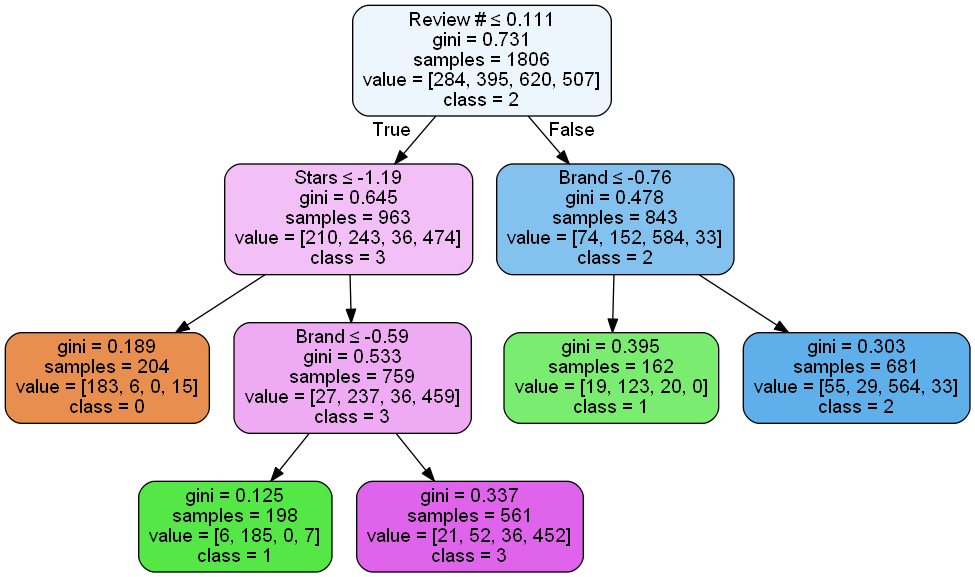

In [575]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled = True,rounded = True, special_characters = True,feature_names= feature_cols,class_names =['0','1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Prune RAmen.png')
Image(graph.create_png())

Random Forest For Kmeans

In [576]:
rclf = RandomForestClassifier(n_estimators= 100)
rclf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[111   2   2   0]
 [  3 172   3   1]
 [  1   6 233   1]
 [  2   2   7 228]]
0.9612403100775194
0.9590244124405615
0.9617227801758882


KNN Classifier for Kmeans

In [577]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [578]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test,y_pred,average='macro'))

Confusion Matrix 
 [[106   3   5   1]
 [  2 169   6   2]
 [  1   3 235   2]
 [  2   1   9 227]]
0.9521963824289406
0.9537997827488193
0.9476919345164967


Naive Bayes:

In [579]:
model = GaussianNB()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('Predicted Value',predicted)

Predicted Value [0 3 1 2 3 2 1 1 3 2 3 1 2 2 2 0 2 1 3 1 2 3 3 1 1 2 3 1 2 3 2 2 3 1 1 3 1
 3 1 1 1 3 3 1 3 3 3 3 1 3 0 1 2 2 1 2 1 2 3 2 2 2 1 3 2 1 3 2 0 2 1 2 1 1
 3 0 2 0 2 0 3 2 0 0 1 0 0 2 0 1 3 2 1 2 2 3 3 3 3 2 1 3 1 1 0 2 3 0 3 3 2
 3 1 3 3 2 0 3 1 2 1 1 1 2 1 3 1 2 0 3 3 0 2 1 2 3 1 3 1 2 2 3 1 3 2 3 2 3
 3 2 2 0 2 1 3 2 2 1 3 1 0 3 3 1 3 3 0 2 2 2 0 1 2 1 1 2 1 0 2 1 3 0 0 2 2
 0 3 0 3 2 3 3 3 0 2 3 3 0 2 0 3 0 2 0 1 0 0 0 2 3 2 3 2 3 1 2 2 2 0 2 3 2
 0 1 2 2 3 3 1 0 2 2 3 2 2 2 3 1 0 2 1 0 1 2 2 3 2 0 1 2 2 2 3 3 3 3 2 1 1
 3 2 0 2 3 2 0 0 0 2 3 2 1 2 3 3 1 2 3 2 3 2 3 3 2 0 3 1 2 0 0 0 2 0 2 0 2
 3 3 3 2 0 1 0 1 1 2 2 0 3 3 0 0 3 1 3 2 2 1 0 3 2 1 0 3 1 2 0 2 0 0 1 2 2
 3 2 3 0 2 2 2 2 3 2 1 3 2 1 2 3 2 3 1 2 2 2 0 1 2 2 1 0 3 2 1 0 3 2 2 2 0
 2 2 3 2 3 3 0 0 3 3 3 2 3 3 3 2 3 0 0 1 0 0 0 3 3 3 2 3 2 2 3 1 1 2 1 0 0
 0 3 0 2 1 3 1 3 2 3 0 2 2 3 3 2 0 2 3 0 3 2 3 2 0 1 3 2 1 1 1 3 2 2 3 1 3
 1 2 3 3 3 0 1 2 2 1 2 3 3 0 2 2 0 1 0 2 2 3 2 3 3 2 3 3 2 1 1 3 1 2 3 0 3
 1 3 3 2 

In [580]:
cm = confusion_matrix(y_true=y_test,y_pred=predicted)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,predicted))
print(metrics.precision_score(y_test,predicted,average='macro'))
print(metrics.recall_score(y_test,predicted,average='macro'))

Confusion Matrix 
 [[109   1   1   4]
 [  5 158  16   0]
 [  2   1 238   0]
 [  4   5   9 221]]
0.937984496124031
0.9374116161616161
0.935686427722717


Kmeans: Random Forest has accuracy 96.1 % 

In [581]:
X=dfx
y=dfy

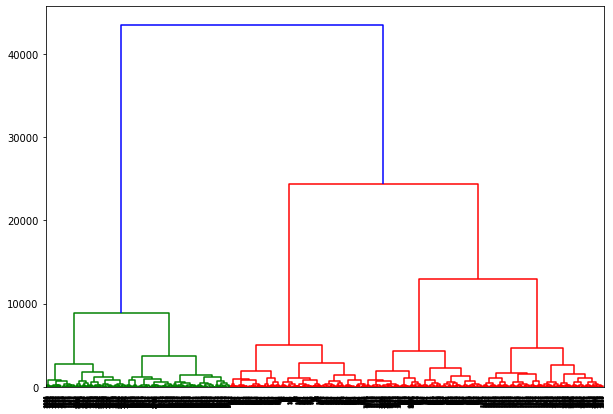

In [582]:

from scipy.cluster.hierarchy import dendrogram , linkage
linked = linkage(X,'ward')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.show()


In [583]:
from sklearn.cluster import AgglomerativeClustering

In [584]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [585]:
y=data['Category']

In [586]:
cm = confusion_matrix(y_true=y,y_pred=cluster.fit_predict(X))
print('Confusion Matrix \n',cm)
print(accuracy_score(y,cluster.fit_predict(X)))

Confusion Matrix 
 [[1035  497]
 [ 690  358]]
0.539922480620155


In [587]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled = X.join(df_labels)
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177) 
df_analysis.head(3)

,Review #,Brand,Country,Stars,labels
0,2579,190,18,33,2
1,2578,119,32,6,0
2,2577,192,35,15,0


In [588]:
X=df_analysis.drop('labels',axis=1)
y=df_analysis['labels']

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [590]:
names = X.columns
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

seed = 7
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.924806 (0.061923)
KNN: 0.708527 (0.112667)
CART: 0.927907 (0.042004)
NB: 0.934496 (0.033000)
RF: 0.937209 (0.040718)


Results after Hierachial Clustering: KNN gives the highest accuracy

# PCA with scaling

In [591]:
X = dfx
y =dfy
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [592]:
from sklearn.decomposition import PCA

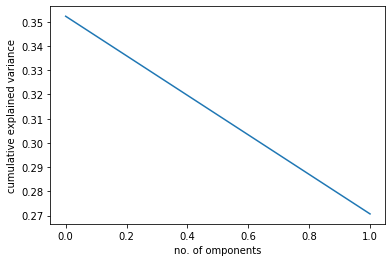

In [593]:

pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('no. of omponents')
plt.ylabel('cumulative explained variance')
plt.show()

In [594]:
names = X.columns
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

seed = 7
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.585659 (0.085226)
KNN: 0.565116 (0.079108)
CART: 0.651938 (0.056695)
NB: 0.560078 (0.085522)
RF: 0.665504 (0.046995)


#### PCA  scaling : Random Forest has highest Accuracy 66.5%

In [612]:
# PCA Without scaling
X = dfx
y = dfy

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=425)

In [613]:
data.head()

,Review #,Brand,Style,Country,Stars,Category
0,2579,190,4,18,33,1
1,2578,119,5,32,6,0
2,2577,192,4,35,15,1
3,2576,336,5,32,18,0
4,2575,38,5,16,33,0


In [614]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [615]:
names = data.columns
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


seed = 7
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.585659 (0.085226)
KNN: 0.565116 (0.079108)
CART: 0.644186 (0.054507)
NB: 0.560078 (0.085522)
RF: 0.666279 (0.053748)


PCA without scaling: RF has the highest Accuracy:66.6%